# Data Story

### Jon Dickerson


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_data = pd.read_csv('../project/data/mainData.csv')
main_data.head()

,title,year,episode_name,season,episode_num,country,date,rating,votes,rank,name,type
0,$#*! My Dad Says,2010,Code Ed,1,4,USA,2010-10-14,6.8,72,6.899713,Alison (V) Brown,writer
1,$#*! My Dad Says,2010,Code Ed,1,4,USA,2010-10-14,6.8,72,6.899713,Justin (II) Halpern,creator
2,$#*! My Dad Says,2010,Code Ed,1,4,USA,2010-10-14,6.8,72,6.899713,David A. Katz,writer
3,$#*! My Dad Says,2010,Code Ed,1,4,USA,2010-10-14,6.8,72,6.899713,David Kohan,creator
4,$#*! My Dad Says,2010,Code Ed,1,4,USA,2010-10-14,6.8,72,6.899713,Michael Lisbe,written by


So we have a data frame, containing a line for each episode of each show for each writer on it. We also have the rating, votes, and rank for that show. Do shows take a while to find their groove? That is, do the ratings improve over the course of a season?

Populating the interactive namespace from numpy and matplotlib


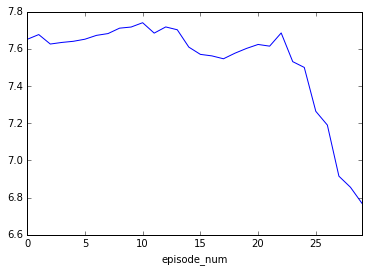

In [20]:
%pylab inline

main_data[main_data.episode_num < 30].groupby('episode_num')['rating'].mean().plot()


There are a couple of interesting peaks there, when do seasons typically end?

In [14]:
main_data.groupby(['title', 'season'])['episode_num'].max().value_counts().head()

13    807
22    615
10    545
1     365
12    339
Name: episode_num, dtype: int64

So we can see most shows have 13 or 22 episodes, corresponding to two of the humps in the graph. The other popular humps occur at episodes 1, 10 and 12, which are also the most common season finales. This suggests that season finales are typically rated higher than any other episdoe, with episode 5 being a particular low point. What about as the show matures further, are later season ranked higher?

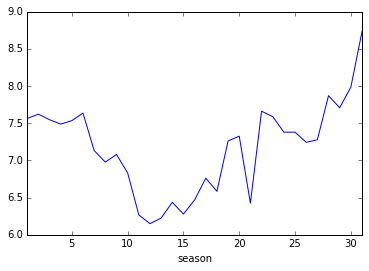

In [21]:
main_data.groupby(['season'])['rating'].mean().plot()

Season 5 seems to be a high point for a show, with a precipitous decline following before leading to a comparative few shows making it to 30+ seasons. However, most shows do not have the longevity to make it 30 seasons. How long does the average show last?

In [19]:
main_data.groupby('title')['season'].max().mean()

2.3884892086330933

Wow, way shorter than I would have imagined. Our two graphs show us that there are definitely maturity periods for shows, but that they also run their course, and if a show is good enough to make it past the average of 2+ seasons, then it will hit its peak around season 5, and should end. By the time you hit season 10, your rank is significantly lower. This probably corresponds to the time a show "needs to end". However, if your show can push past that point, you seem to increase toward later seasons.